HW_8 by 22000690 정이주

1. Objective : Classification

2. Input

  * mnist.pkl

3. Output

  * rforest test score
  * decisionTree test score
  * decision tree
  * random forest

### student code
## STEP1. Load MNIST data and split into train and test data

In [12]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')
with open('mnist.pkl', 'rb') as f:  # open file
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [13]:
# make data set
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label']) # get data column name is 'label'
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label']) # get data column name is 'label'

In [14]:
sub_train_x = train_x.iloc[:500, :]
sub_train_y = train_y.iloc[:500]
sub_test_x = test_x.iloc[:100, :]
sub_test_y = test_y.iloc[:100, :]

----
## STEP2 Classify MNIST data using __Decision Tree__🌲 sklearn library 

In [15]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0, criterion="entropy")
decisionTree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
print("=== > Test set score : {:.2f}".format(decisionTree.score(test_x, test_y)))

=== > Test set score : 0.88


---
## STEP3 Classify MNIST data using __Random Forest__🌲 sklearn library 

In [17]:
from sklearn.ensemble import RandomForestClassifier

## YOUR CODE STARTS HERE
rforest = RandomForestClassifier(random_state=0)
rforest.fit(train_x, train_y)

/var/folders/bl/x_6zsqdn3f33x78knpgzrqvw0000gn/T/ipykernel_942/1948550655.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(train_x, train_y)


RandomForestClassifier(random_state=0)

In [18]:
print("Test set score : {:.2f}".format(rforest.score(test_x, test_y)))

Test set score : 0.97


-----
## STEP4 Visualization of result

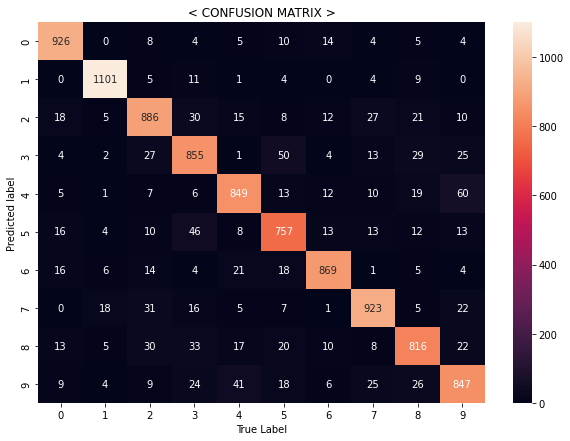

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# decision tree show
pred_y = decisionTree.predict(test_x) # decisionTree predict
cmdtree = confusion_matrix(test_y, pred_y)

plt.figure(figsize=(10,7))
sn.heatmap(cmdtree, annot=True, fmt='d')

plt.title(" < CONFUSION MATRIX > ")
plt.ylabel('Predicted label')
plt.xlabel('True Label')

plt.show()

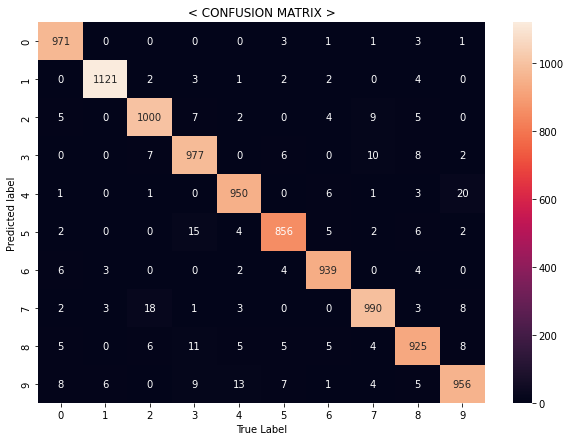

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# rforest show
pred_y = rforest.predict(test_x)  # rforest predict
rtree_cmd = confusion_matrix(test_y, pred_y)

plt.figure(figsize = (10, 7))
sn.heatmap(rtree_cmd, annot=True, fmt='d')

plt.title(" < CONFUSION MATRIX > ")
plt.ylabel('Predicted label')
plt.xlabel('True Label')

plt.show()